In [4]:
import os
import hashlib

import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import set_matplotlib_formats

from sdcdup.utils import get_project_root
from sdcdup.utils import get_tile
from sdcdup.visualization import get_ticks
from sdcdup.visualization import draw_bbox
from sdcdup.visualization import draw_tile_number
from sdcdup.visualization import draw_tile_bbox

%load_ext dotenv
%dotenv
%matplotlib inline
%reload_ext autoreload
%autoreload 2

RED = (244, 67, 54)  #F44336
GREEN = (76, 175, 80)  #4CAF50
BLUE = (3, 169, 244)  #03A9F4

set_matplotlib_formats('pdf', 'png')
plt.rcParams['font.size'] = 16
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8

# plt.rcParams['text.usetex'] = True
# plt.rcParams['font.family'] = "serif"
# plt.rcParams['font.serif'] = "cm"
# plt.rcParams['text.latex.preamble'] = r"\usepackage{subdepth}, \usepackage{type1cm}"

project_root = get_project_root()
train_image_dir = os.path.join(project_root, os.getenv('RAW_DATA_DIR'), 'train_768')
persistent_data_dir = os.path.join(project_root, os.getenv('PERSISTENT_DATA_DIR'))
samples_dir = os.path.join(persistent_data_dir, 'samples')
figures_dir = os.path.join(project_root, 'notebooks', 'figures')

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


### Display the template overlay showing the tiled regions numbered 0 through 8.

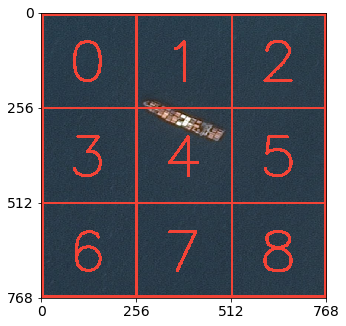

In [5]:
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 5
line_type = 8
bbox_thickness = 6
ticks = get_ticks()
img_id = '536356d11.jpg'
imagefile0 = os.path.join(samples_dir, img_id)

img = cv2.cvtColor(cv2.imread(imagefile0), cv2.COLOR_BGR2RGB)
for idx in range(9):
    draw_tile_bbox(img, idx, bbox_thickness, RED)
    draw_tile_number(img, idx, color=RED)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(img)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.tight_layout()
# plt.savefig(os.path.join(figures_dir, img_id))

### Split the upper portion of the image into two quads.

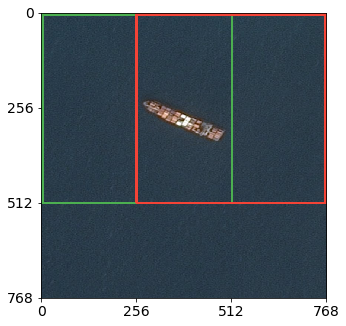

In [6]:
bbox1 = np.array([[0, 0], [512, 512]])
bbox2 = np.array([[256, 0], [768, 512]])

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
img = cv2.cvtColor(cv2.imread(imagefile0), cv2.COLOR_BGR2RGB)
draw_bbox(img, bbox1, bbox_thickness, GREEN)
draw_bbox(img, bbox2, bbox_thickness, RED)
ax.imshow(img)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.tight_layout()

### Save the cropped images as jpegs.

In [10]:
filebase, fileext = imagefile0.split('.')

img1 = cv2.imread(imagefile0)
img1 = img1[:512, :512, :]
imagefile1 = os.path.join(f'{filebase}_04.{fileext}')
cv2.imwrite(imagefile1, img1)

img2 = cv2.imread(imagefile0)
img2 = img2[:512, 256:, :]
imagefile2 = os.path.join(f'{filebase}_15.{fileext}')
cv2.imwrite(imagefile2, img2);

### Read the saved cropped images right back in.

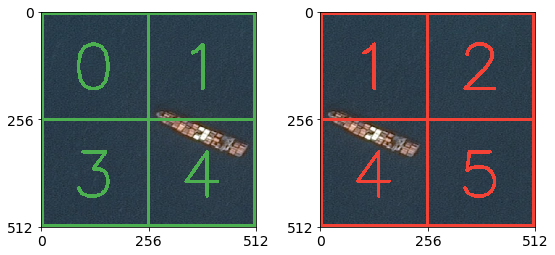

In [12]:
ticks = get_ticks(512)
img1 = cv2.cvtColor(cv2.imread(imagefile1), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread(imagefile2), cv2.COLOR_BGR2RGB)

for idx0, (idx1, idx2) in enumerate(zip([0, 1, 3, 4], [1, 2, 4, 5])):
    draw_tile_bbox(img1, idx0, bbox_thickness, GREEN, img_size=512)
    draw_tile_number(img1, idx0, value=idx1, img_size=512, color=GREEN)
    draw_tile_bbox(img2, idx0, bbox_thickness, RED, img_size=512)
    draw_tile_number(img2, idx0, value=idx2, img_size=512, color=RED)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(img1)
ax[0].set_xticks(ticks)
ax[0].set_yticks(ticks)
ax[1].imshow(img2)
ax[1].set_xticks(ticks)
ax[1].set_yticks(ticks)
plt.tight_layout()

In [13]:
def get_tile22(img, idx, sz=256):
    ij_pairs_2x2 = ((0, 0), (0, 1), (1, 0), (1, 1))
    i, j = ij_pairs_2x2[idx]
    return img[i * sz:(i + 1) * sz, j * sz:(j + 1) * sz, :]

img = cv2.imread(imagefile0)
for idx in range(9):
    tile = get_tile(img, idx)
    print(idx, hashlib.md5(tile.tobytes()).hexdigest()[:4], tile.shape, np.max(tile, axis=(0, 1)))
print('')
img1 = cv2.imread(imagefile1)
for idx1, idx0 in enumerate([0, 1, 3, 4]):
    tile = get_tile22(img1, idx1)
    print(idx0, hashlib.md5(tile.tobytes()).hexdigest()[:4], tile.shape, np.max(tile, axis=(0, 1)))
print('')
img2 = cv2.imread(imagefile2)
for idx2, idx0 in enumerate([1, 2, 4, 5]):
    tile = get_tile22(img2, idx2)
    print(idx0, hashlib.md5(tile.tobytes()).hexdigest()[:4], tile.shape, np.max(tile, axis=(0, 1)))


0 648d (256, 256, 3) [93 78 59]
1 75aa (256, 256, 3) [167 175 205]
2 d727 (256, 256, 3) [96 82 63]
3 a6e1 (256, 256, 3) [93 78 61]
4 cb3e (256, 256, 3) [255 255 255]
5 6247 (256, 256, 3) [90 76 59]
6 9510 (256, 256, 3) [94 80 62]
7 71da (256, 256, 3) [93 77 60]
8 4bf5 (256, 256, 3) [91 76 58]

0 7f24 (256, 256, 3) [93 78 59]
1 5dee (256, 256, 3) [167 175 205]
3 5664 (256, 256, 3) [93 78 61]
4 9533 (256, 256, 3) [255 255 255]

1 9e86 (256, 256, 3) [167 175 205]
2 e7a9 (256, 256, 3) [96 82 63]
4 f1a7 (256, 256, 3) [255 255 255]
5 ef8e (256, 256, 3) [90 76 59]


None of the hashes are the same for the overlapping tiles:

 * Tile 1: `75aa != 5dee != 9e86`
 * Tile 4: `cb3e != 9533 != f1a7`

This makes it impossible to determine overlap by using direct comparison.